[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/https://github.com/SuanandaYogi/Python_Tutorial/blob/master/Sesi%202%20-%20Pengenalan%20Python%20untuk%20Ilmu%20Geofisika.ipynb)

# Optimasi pendekatan Global

Tujuan optimasi pendekatan global adalah menemukan model paling optimum sebagai solusi dari permasalahan.

## Pemoldelan Kedepan (_Forward Modeling_)

Pemodelan kedepan adalah proses menyimulasikan hasil dengan parameter-parameter model yang kita miliki, sedangkan inversi adalah mendapatkan parameter-parameter model dari data yang diukur di lapangan. Di dalam proses inversi pasti ada proses pemodelan kedepan. Penjelasan ini digambarkan dalam ilustrasi kasus gempa bumi berikut.



Gambar


Selanjutnya kita akan bahas pemodelan kedepan dari kejadian gempa bumi sederhana 1D.

Dalam sebuah kejadian gempa bumi kita dituntut untuk mengetahui posisi lokasi sumber (x,y,z) dengan data rekaman seismometer. Pada data seismometer kita dapat menentukan waktu tiba gelombang gempa bumi. Dari data waktu tiba tersebut lah kita akan menentukan parameter lokasi sumber gempa bumi. Sebelum menentukan lokasi sumber gempa dari data, atau disebut sebagai proses inversi, kita buat simulasi bagaimana gelombang gempa merambat hingga tiba di stasiun dalam kasus 1D.
Misalkan diketahui bahwa gelombang gempa menjalar dengan kecepatan gelombang sebesar 7 km/jam, kita dapat menentukan lamanya waktu tempu dari sumber ($x_{s}$) ke stasiun gempa 1, 2, 3, dll ($x_{1}$,$x_{2}$,$x_{3}$,dll) dengan 
$$t_{i} = \sqrt{(x_{i}-x_{s})^{2}}$$

misalkan sebuah gempa bumi terjadi pada titik x = -3, posisi stasiun 1 di x = 2, stasiun 2 di x = -6, stasiun 3 di x = 7, maka dapat kita simulasikan waktu tiba gelombang gempa dengan perhitungan numerik berikut ini

In [9]:
#memanggil modul numpy

import numpy as np

#membuat fungsi pemodelan kedepan waktu tiba gelombang gempa bumi pada kasus 1D

def fw_waktu_1d(xs,xi):
    #xs adalah posisi sumber (km)
    #xi adalah posisi stasiun ke-i (km)
    
    vp = 7 #kecepatan gelombang gempa (P) 7km/jam
    t = np.sqrt((xs-xi)**2)/vp #menghitung waktu tiba gelombang gempa pada stasiun ke-i
    return t #output nilai t dijadikan hasil perhitungan fungsi

In [10]:
#kita uji fungsi tersebut
fw_waktu_1d(0,7)

1.0

In [13]:
#kita definisikan posisi sumber dan stasiun

posisi_sumber = -3 #posisi sumber gempa bumi
posisi_stasiun = np.array([2,-6,7]) #posisi stasiun ke-i dalam bentuk array
N_stasiun = posisi_stasiun.size

for it in range(N_stasiun):
    print(fw_waktu_1d(posisi_sumber,posisi_stasiun[it]))


0.7142857142857143
0.42857142857142855
1.4285714285714286


## Trial and Error Forward modeling

Dengan posisi stasiun yang sama, kita mencatat sebuah kejadian gempa bumi dengan data waktu tiba berikut 

|Stasiun | Posisi (km) | Waktu tiba (s)|
|-|-|-|
|1|2|1.36|
|2|-6|0.21|
|3|7|2.07|

Coba tentukan posisi sumber gempa bumi dengan cara di atas.

In [24]:
#kita definisikan posisi sumber dan stasiun

posisi_sumber =  0 #isikan posisi sumber uji coba

posisi_stasiun = np.array([2,-6,7]) #posisi stasiun ke-i dalam bentuk array
N_stasiun = posisi_stasiun.size

for it in range(N_stasiun):
    print(fw_waktu_1d(posisi_sumber,posisi_stasiun[it]))

0.2857142857142857
0.8571428571428571
1.0


Karena sulit melihat kecocokan masing-masing data, kita gunakan RMS sebagai indikator data yang disimulasikan mirip dengan data yang direkam. Untuk itu kita buat sedemikian hingga proses ini dapat menggunakan fungsi RMS yang telah kita buat sebelumnya.

Kita buat ulang `Fungsi_RMS` dari file sebelumnya

In [33]:
def Fungsi_RMS(d_cal,d_obs):
    jumlah = 0
    N = d_obs.size
    for it in range(N):
        kuadratdd = (d_cal[it]-d_obs[it])**2 #melakukan perhitungan d_cal dan d_obs ke-i
        jumlah = jumlah + kuadratdd

    rata2 = jumlah/N
    RMS = np.sqrt(rata2)
    return RMS

Anda dapat mencari posisi sumber yang memiliki nilai RMS terkecil.

In [44]:
# mendefiniskan t_obs

t_obs = np.array([1.36, 0.21, 2.07])

#kita definisikan posisi sumber dan stasiun

posisi_sumber =  0 #isikan posisi sumber uji coba

posisi_stasiun = np.array([2,-6,7]) #posisi stasiun ke-i dalam bentuk array
N_stasiun = posisi_stasiun.size

t_cal = np.zeros(N_stasiun) #menyiapkan array kosong untuk menyimpan data simulasi 
for it in range(N_stasiun):
    t_cal[it] = fw_waktu_1d(posisi_sumber,posisi_stasiun[it])
    
#menghitung RMS dengan fungsi sebelumnya
Fungsi_RMS(t_cal,t_obs)

0.9518024433444487

Pada contoh di atas proses menghitung nilai waktu dari posisi sumber adalah proses _forward modeling_, di mana posisi sumber (x) adalah parameter model yang dijadikan input.

Apa yang anda bisa pahami dari proses uji coba di atas?

Selanjutnya kita coba proes uji coba yang dilakukan secara otomatis oleh komputer. Ide yang akan dilakukan adalah secara bertahap menggunakan posisi dari nilai ujung tertentu misal -10 sampai 10. Dari setiap posisi yang digunakan kita hitung nilai RMS sehingga kita dapat mengetahui di mana lokasi yang memiliki RMS terkecil. Berikut ini ilustrasi proses tersebut


In [65]:
t_obs = np.array([1.36, 0.21, 2.07])

#kita definisikan posisi sumber dan stasiun
jumlah_sampel = 21
list_posisi_sumber = np.linspace(-10,10,num=jumlah_sampel)
print(list_posisi_sumber)

#kita siapkan array RMS untuk menyimpan proses uji coba
list_RMS = np.zeros(jumlah_sampel)
#kita letakkan pendefinisian ini diluar iterasi (loop) karena tidak berubah selama iterasi
posisi_stasiun = np.array([2,-6,7]) #posisi stasiun ke-i dalam bentuk array
N_stasiun = posisi_stasiun.size

#karena ada 2 iterasi, maka kita bedakan masing-masing iterator
for it1 in range(jumlah_sampel):
    posisi_sumber =  list_posisi_sumber[it1] #isikan posisi sumber uji coba

    t_cal = np.zeros(N_stasiun) #menyiapkan array kosong untuk menyimpan data simulasi 
    for it2 in range(N_stasiun):
        t_cal[it2] = fw_waktu_1d(posisi_sumber,posisi_stasiun[it2])

    #menghitung RMS dengan fungsi sebelumnya
    list_RMS[it1] = Fungsi_RMS(t_cal,t_obs)


[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


Kita cari posisi di mana RMS terkecil dengan memperkenalkan sebuah konsep dalam pemrograman, kondisi (_conditional_)

## _Conditional_

In [100]:
a = 3
if a<3:
    print('benar')

menambahkan `else` untuk kondisi yang salah

In [101]:
a = 3
if a<3:
    print('benar')
else:
    print('salah')

salah


In [103]:
#Misalkan kita memiliki array dengan nilai
arr_a = np.array([-1,2,4,10])

#kita ingin mengetahui apakah tiap elemen kurang dari 3 atau tidak. 
#kita lakukan dengan menggabungkan iterasi dengan kondisi
jum_arr_a = arr_a.size
for ite in range(jum_arr_a):
    if arr_a[ite]<3:
        print(arr_a[ite],'kurang dari 3')
    else:
        print(arr_a[ite],'tidak kurang dari 3')

-1 kurang dari 3
2 kurang dari 3
4 tidak kurang dari 3
10 tidak kurang dari 3


Plot data RMS untuk tiap sampel dari posisi sumber stasiun beserta posisi stasiun

In [76]:
import matplotlib.pyplot as plt

nilai RMS terkecil 0.07053729654644857
posisi dengan nilai RMS terkecil -7.0


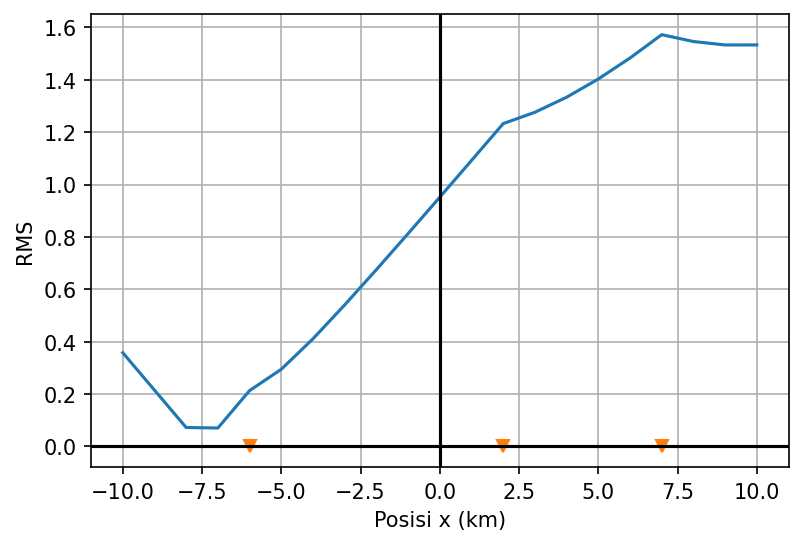

In [93]:
indeks_posisi_terkecil = np.where(list_RMS==min(list_RMS))[0][0]
posisi_terkecil = list_posisi_sumber[indeks_posisi_terkecil]

print('posisi dengan nilai RMS terkecil', posisi_terkecil)

plt.figure(dpi=150)
plt.plot(list_posisi_sumber,list_RMS)
plt.plot(posisi_stasiun,[0,0,0],'v')
plt.grid()
plt.axhline(linewidth=1.5, color='k') #menambahkan sumbu x pada y = 0
plt.axvline(linewidth=1.5, color='k') #menambahkan sumbu y pada x = 0
plt.xlabel('Posisi x (km)')
plt.ylabel('RMS')
plt.show()

